In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [2]:
# loading the data from csv file to a Pandas DataFrame
cust_data = pd.read_csv('Mall_Customers.csv')

# first 5 rows in the dataframe
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# finding the number of rows and columns
cust_data.shape


(200, 5)

In [4]:
# getting some informations about the dataset
cust_data.info()

#Non-Null Count- tells us that there is no null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


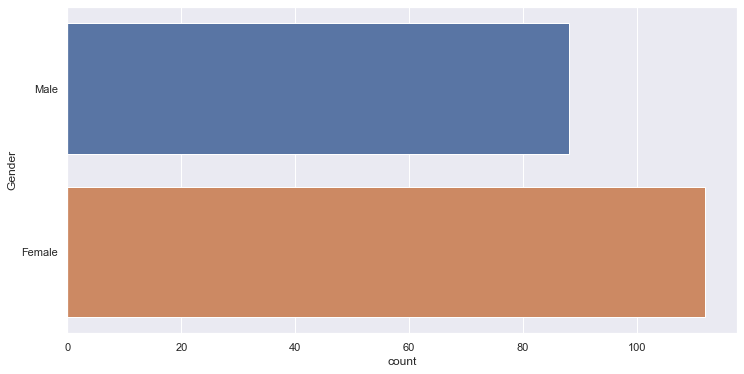

In [28]:
plt.figure(figsize = (12 , 6))
sns.countplot(y = 'Gender' , data = cust_data)
plt.show()

In [ ]:
1. Choosing the Annual Income Column & Spending Score 

In [6]:
X = cust_data.iloc[:,3:5]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
wcss = []

for i in range(1,9):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


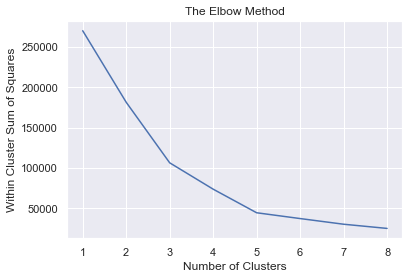

In [8]:
plt.plot(range(1,9),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

#This shows us that the elbow point is at n=5, so 5 is the optimum value of the no. of clusters

In [9]:
kmeans = KMeans(5)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
Y


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [10]:
clusters=X.copy()
clusters['clusters_Pred']=Y
clusters

,Annual Income (k$),Spending Score (1-100),clusters_Pred
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


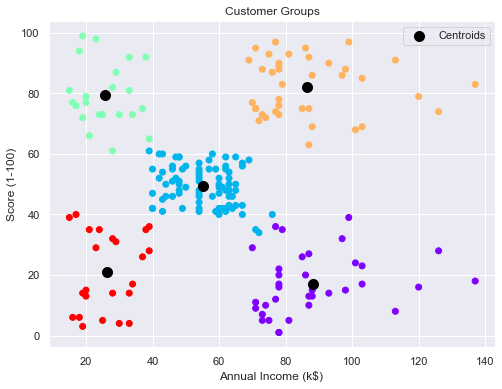

In [11]:
# plot the Clusters and their respective Centroids

plt.figure(figsize=(8,6))
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=clusters['clusters_Pred'],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.legend()
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Score (1-100)')
plt.show()

In [12]:
X1 = cust_data.iloc[:,2:5:2]
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


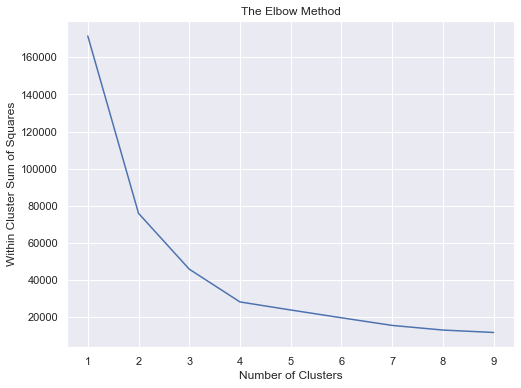

In [21]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

#This shows us that the elbow point is at n=4, so 4 is the optimum value of the no. of clusters

In [22]:
kmeans = KMeans(4)

# return a label for each data point based on their cluster
Y1 = kmeans.fit_predict(X1)
Y1


array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [23]:
clusters2=X1.copy()
clusters2['clusters_Pred']=Y1
clusters2

,Age,Spending Score (1-100),clusters_Pred
0,19,39,3
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,3
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,1


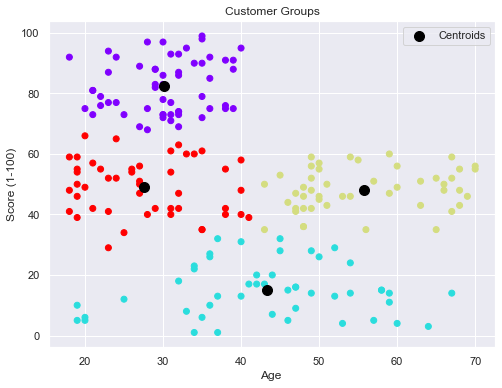

In [24]:
# plot the Clusters and their respective Centroids

plt.figure(figsize=(8,6))
plt.scatter(clusters2['Age'],clusters2['Spending Score (1-100)'],c=clusters2['clusters_Pred'],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.legend()
plt.title('Customer Groups')
plt.xlabel('Age ')
plt.ylabel('Score (1-100)')
plt.show()